**Write your code in Jupyter Notebook or Google Colab, and submit the ipynb file to Canvas.**

In [178]:
# import all necessary packages

import numpy as np
import os
import timeit

np.random.seed(42)

# To plot pretty figures
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Python and Numpy 101

**Q1.** Generate a 100,000 x 1 vector of random numbers from a Gaussian distribution with mean of 0 and standard deviation of 1 using numpy. (5 pts)

In [179]:
# Your code here
mu, sigma = 0, 1
a = np.random.normal(mu, sigma, size=(100000,1))

print(f'First five elements of a are:\n{a[0:5]}')
print(f'Shape of a is {a.shape}')

First five elements of a are:
[[ 0.49671415]
 [-0.1382643 ]
 [ 0.64768854]
 [ 1.52302986]
 [-0.23415337]]
Shape of a is (100000, 1)


**Q2.**
Add 1 to every value in the previous vector by using a loop. Time this operation and print the number. 

Add 1 to every value in the original vector without using a loop (try vector/matrix oepration!). Time this operation and print the number. 

Describe your observations. (5 pts)

In [180]:
# Your code here
# With loop

b = np.zeros(shape=(100000,1))

start = timeit.default_timer()
for i in range(b.size):
  b[i] = a[i] + 1
stop = timeit.default_timer()

print(f'Runtime is {stop - start} seconds') 
print(f'First five elements of b are:\n{b[0:5]}')
print(f'Shape of b is {b.shape}')

Runtime is 0.20781184699808364 seconds
First five elements of b are:
[[1.49671415]
 [0.8617357 ]
 [1.64768854]
 [2.52302986]
 [0.76584663]]
Shape of b is (100000, 1)


In [181]:
# Your code here
# Without loop

start = timeit.default_timer()
c = np.add(a, 1)
stop = timeit.default_timer()

print(f'Runtime is {stop - start} seconds') 
print(f'First five elements of c are:\n{c[0:5]}')
print(f'Shape of c is {c.shape}')

Runtime is 0.0008109490008791909 seconds
First five elements of c are:
[[1.49671415]
 [0.8617357 ]
 [1.64768854]
 [2.52302986]
 [0.76584663]]
Shape of c is (100000, 1)


## Answer:
**Matrix addition operation in numpy is much faster than looping through each value (in this case it is at least several hundred times faster)**

**Q3.** Generate two random matrices $A$ and $B$. The shape of the $A$ and $B$ should be [5, 4] and [4, 5]. Compute their product using loops and the matrix operation $A*B$. Compare the results and describe your findings. (5 pts)

In [182]:
# Your code here
# Generate random matrices
A = np.random.rand(5, 4)
B = np.random.rand(4, 5)

In [183]:
# Your code here
# With loop

C = np.zeros(shape=(A.shape[0], B.shape[1]))

start = timeit.default_timer()
for i in range(A.shape[0]):
  for j in range(B.shape[1]):
    C[i][j] = sum([np.multiply(A[i,k], B[k,j]) for k in range(A.shape[1])])
stop = timeit.default_timer()

print(f'Runtime is {stop - start} seconds') 
print(f'C:\n{C}')

Runtime is 0.00045657100054086186 seconds
C:
[[0.83927323 1.57489264 0.96407711 1.0117316  1.2658243 ]
 [0.62761549 1.32096171 0.60884684 0.39727696 0.73313246]
 [0.83177079 1.64868317 1.05498142 0.83081266 1.17912192]
 [0.48486001 1.09773292 0.52032898 1.02931478 0.92538218]
 [0.6593265  1.24942131 0.63482119 0.63071598 0.88899803]]


In [184]:
# Your code here
# Without loop

start = timeit.default_timer()
D = np.dot(A,B)
stop = timeit.default_timer()

print(f'Runtime is {stop - start} seconds') 
print(f'D:\n{D}')

Runtime is 0.00030594000054406933 seconds
D:
[[0.83927323 1.57489264 0.96407711 1.0117316  1.2658243 ]
 [0.62761549 1.32096171 0.60884684 0.39727696 0.73313246]
 [0.83177079 1.64868317 1.05498142 0.83081266 1.17912192]
 [0.48486001 1.09773292 0.52032898 1.02931478 0.92538218]
 [0.6593265  1.24942131 0.63482119 0.63071598 0.88899803]]


## Answer:
**Matrix dot product operation in numpy is much faster than looping**

**Q4.** Implement the sigmoid function $sigmoid(x)=\frac{1}{1+e^{-x}}$ and plot it on the interval [-10, 10] using matplotlib. (5 pts)

Implement the function sigmoid_grad() to compute the gradient of the sigmoid function w.r.t. its input x and plot it on the interval [-10, 10] using matplotlib. (5 pts)

In [185]:
# Your code here

def sigmoid(x):
  return 1/(1 + np.exp(-x))

def sigmoid_grad(x):
  return np.exp(-x)/np.square((1 + np.exp(-x)))

x = 0.8
sigmoid(x), sigmoid_grad(x)

(0.6899744811276125, 0.21390969652029443)

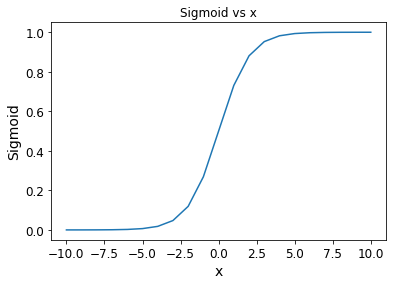

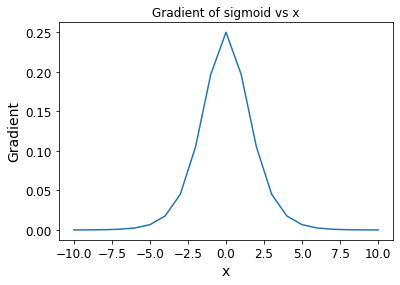

In [186]:
X = [x for x in range(-10, 11)]
sig = [sigmoid(x) for x in X]
grad = [sigmoid_grad(x) for x in X]

plt.plot(X, sig)
plt.title("Sigmoid vs x")
plt.xlabel("x")
plt.ylabel("Sigmoid")
plt.show()

plt.plot(X, grad)
plt.title("Gradient of sigmoid vs x")
plt.xlabel("x")
plt.ylabel("Gradient")
plt.show()

# Linear Regression

Please read the following example code for linear regression and implement the rest of the exercises.

## Implement Linear Regression Using Normal Equation

$y=wx + b$

E.g., We want to approximiate $y = 3x + 4$\
Loss function: $L = \sum_i^m ||y_i - (wx_i+b))||^2$

In [187]:
# Generate training data
m = 100 # number of data
X = 5 * np.random.rand(m, 1) # Create an array of the given shape and populate it with random samples from a uniform distribution over [0, 1).
y = 4 + 3 * X + np.random.randn(m, 1) # a sample (or samples) from the “standard normal” distribution with mean 0 and std 1.

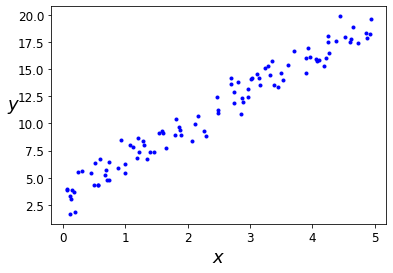

In [188]:
plt.plot(X, y, "b.")
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.show()

Normal Equation: $w=(X^TX)^{-1}X^Ty$

Add bias term to each instance $[1, x]$\
$y=wx+b$ ⇨ $y=[1, x]\begin{bmatrix}b\\w \end{bmatrix}$ ⇨ $y=X w$\
Loss function: $L = ||y-Xw||_2^2$

**Solve the linear regression problem using normal equation.**

In [189]:
X_b = np.c_[np.ones((m, 1)), X]  # add bias term x0 = 1 to each instance
X_b.shape
X_b

array([[1.        , 1.07104412],
       [1.        , 2.29838994],
       [1.        , 2.70345307],
       [1.        , 4.86776238],
       [1.        , 4.88149741],
       [1.        , 2.48675488],
       [1.        , 0.71047734],
       [1.        , 4.4376281 ],
       [1.        , 0.13362523],
       [1.        , 2.25957765],
       [1.        , 2.49124285],
       [1.        , 0.73493636],
       [1.        , 1.85762142],
       [1.        , 3.35835492],
       [1.        , 3.49267108],
       [1.        , 3.8936203 ],
       [1.        , 2.8667628 ],
       [1.        , 1.46809223],
       [1.        , 0.06145103],
       [1.        , 3.02983919],
       [1.        , 2.81551018],
       [1.        , 3.16908612],
       [1.        , 4.65366401],
       [1.        , 1.18899086],
       [1.        , 3.53266893],
       [1.        , 1.00181204],
       [1.        , 3.92933585],
       [1.        , 0.15338458],
       [1.        , 1.34486587],
       [1.        , 1.28927476],
       [1.

In [190]:
# w_best = np.linalg.inv(X_b.T@(X_b))@(X_b.T)@(y)  # @: matrix multiplication == np.matmul, np.dot

w_best = np.linalg.pinv(X_b.T@(X_b))@(X_b.T)@(y)  # np.linalg.pinv: Compute the (Moore-Penrose) pseudo-inverse of a matrix (fast: quadratic convergence).

In [191]:
w_best  # b, w

array([[3.43534631],
       [3.19736721]])

In [192]:
# evaluate the trained linear model
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance
y_predict = X_new_b @w_best
y_predict

array([[3.43534631],
       [9.83008073]])

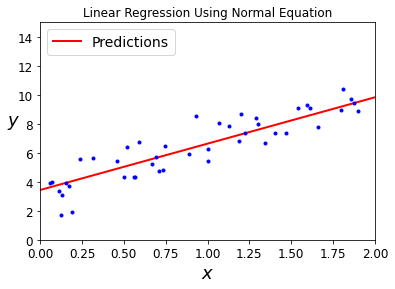

In [193]:
plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")
plt.plot(X, y, "b.")
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 15])
plt.title("Linear Regression Using Normal Equation")
# save_fig("linear_model_predictions")
plt.show()

**Q5.** Implement Linear Regression with multiple features using Normal Equation.
Please modify the example code above and provide the solution when there are $M (M>1)$ features in the training data.\
E.g., $y=4+3x_1+4x_2+8x_3$.\
You do not need to plot the results. You cannot use sklearn in this exercise. (15 pts)


Inputs: 
- x_train: $N\times M$ matrix with $N$ samples and $M$ features, representing the features of the training data.
- y_train: $N\times 1$ vector, representing the labels of the training data.

Output:
- w: $(M + 1)\times 1$ vector of the weight.

In [194]:
# Your code here

# 1. Generate training and test data
# m is the overall number of observations
N = 100 # number of train observations
M = 3 # number of features
p = 0.3 # test data size / m

np.random.seed(50)
x_train = 5 * np.random.rand(N, M) # Generate X train with N observations and M features
y_train = 4 + x_train @ np.full((x_train.shape[1], 1), 3) + np.random.randn(N, 1) # Generate y train with N observations and M features
x_test = 5 * np.random.rand(int(p*N/(1-p)), M) # Generate X test with floor(p*m) observations and M features
y_test = 4 + x_test @ np.full((x_test.shape[1], 1), 3) + np.random.randn(int(p*N/(1-p)), 1) # Generate y test with floor(p*m) observations and M features

# 2. implement linear regression using normal equation
def linear_regression_normal(x_train, y_train):
  x_train_b = np.c_[np.ones((N, 1)), x_train] # add bias term
  # @: matrix multiplication == np.matmul, np.dot
  w_best = np.linalg.pinv((x_train_b.T)@x_train_b)@(x_train_b.T)@(y_train) # pseudo-inverse of a matrix
  return w_best

# 3. train model
w = linear_regression_normal(x_train, y_train)

# 4. evaluate your model on test data using mean square error
x_test_b = np.c_[np.ones((x_test.shape[0], 1)), x_test] # add bias term
y_hat = x_test_b @ w

print(f'Size of X train is {x_train.shape}')
print(f'Size of y train is {y_train.shape}')
print(f'Size of X test is {x_test.shape}')
print(f'Size of y test is {y_test.shape}')
print(f'Size of y_hat is {y_hat.shape}')

# the predicted weight vector should be close to [[4],[3],[3],[3]]
print(f'The predicted weight vector:\n{w}')

# SE and MSE on the test set
SE = np.sum(np.square(np.subtract(y_test, y_hat)))
MSE = SE/y_test.shape[0]
print(f'SUM SE on the test set:{SE}')
print(f'MSE on the test set:{MSE}')

Size of X train is (100, 3)
Size of y train is (100, 1)
Size of X test is (42, 3)
Size of y test is (42, 1)
Size of y_hat is (42, 1)
The predicted weight vector:
[[4.07474518]
 [2.91543595]
 [3.0698626 ]
 [2.96861009]]
SUM SE on the test set:34.65204685510227
MSE on the test set:0.8250487346452922


## Implement Linear Regression Using Gradient Descent.

$y=wx + b$

E.g., We want to approximiate $y = 2x + 5$

In [195]:
# Generate some training data
m = 30 # number of data
X = 2 * np.random.rand(m, 1) # Create an array of the given shape and populate it with random samples from a uniform distribution over [0, 1).
y = 5 + 2 * X + np.random.randn(m, 1) # a sample (or samples) from the “standard normal” distribution with mean 0 and std 1.

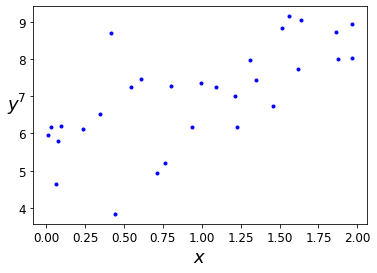

In [196]:
plt.plot(X, y, "b.")
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.show()

# Linear regression using gradient descent (GD)

$w^{t+1} = w^t - \eta \nabla_w L(w^t)$

$\nabla_w L(w^t) = 2X^TXw-2X^Ty = 2X^T(Xw - y)$

In [197]:
X_b = np.c_[np.ones((m, 1)), X]  # add bias term x0 = 1 to each instance

eta = 0.1
n_iterations = 1000
w = np.random.randn(2,1) # random initial weight [b, w]

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T@(X_b@w - y) # we calculate the average gradient by dividing the gradient by the number of samples $m$
    w = w - eta * gradients

In [198]:
w

array([[5.6009045],
       [1.4833986]])

Mean Square Error (MSE): $L = \frac{1}{m}\sum_i^m ||y_i - (wx_i+b))||^2$

In [199]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance
y_predict = X_new_b @w

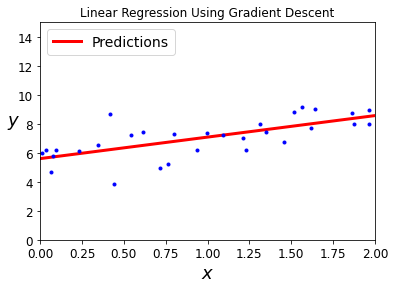

In [200]:
plt.plot(X_new, y_predict, "r-", linewidth=3, label="Predictions")
plt.plot(X, y, "b.")
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.title("Linear Regression Using Gradient Descent")
plt.axis([0, 2, 0, 15])
plt.show()

**Q6.** Implement Linear Regression with multiple features using gradient descent.
Please modify the example code above and provide the solution when there are $M (M>1)$ features in the training data.\
E.g., $y=4+3x_1+4x_2+8x_3$.\
You do not need to plot the results. You cannot use sklearn in this exercise. (15 pts)

Inputs: 
- x_train: $N\times M$ matrix with $N$ samples and $M$ features, representing the features of the training data.
- y_train: $N\times 1$ vector, representing the labels of the training data.
- lr: learning rate used in gradient descent.
- iterations: number of iterations to run the gradient descent.

Output:
- w: $(M+1)\times 1$ vector.

In [201]:
# Your code here

# 1. generate your training and test data
# m is the overall number of observations
N = 100 # number of train observations
M = 3 # number of features
p = 0.3 # test data size / m

np.random.seed(50)
x_train = 5 * np.random.rand(N, M) # Generate X train with N observations and M features
y_train = 4 + x_train @ np.full((x_train.shape[1], 1), 3) + np.random.randn(N, 1) # Generate y train with N observations and M features
x_test = 5 * np.random.rand(int(p*N/(1-p)), M) # Generate X test with floor(p*m) observations and M features
y_test = 4 + x_test @ np.full((x_test.shape[1], 1), 3) + np.random.randn(int(p*N/(1-p)), 1) # Generate y test with floor(p*m) observations and M features

# 2. implement linear regression using gradient descent
def linear_regression_gd(x_train, y_train):
  x_train_b = np.c_[np.ones((N, 1)), x_train] # add bias term

  eta = 0.01
  n_iterations = 1000
  np.random.seed(50)
  w = np.random.randn(x_train_b.shape[1], 1) # randomly initial weights [b, w]

  for iteration in range(n_iterations):
    gradients = 2/m * x_train_b.T@(x_train_b@w - y_train) # calculate gradients (average)
    w = w - eta * gradients
  return w

# 3. train model
w = linear_regression_gd(x_train, y_train)

# 4. evaluate your model on test data using mean square error
x_test_b = np.c_[np.ones((x_test.shape[0], 1)), x_test] # add bias term
y_hat = x_test_b @ w

print(f'Size of X train is {x_train.shape}')
print(f'Size of y train is {y_train.shape}')
print(f'Size of X test is {x_test.shape}')
print(f'Size of y test is {y_test.shape}')
print(f'Size of y_hat is {y_hat.shape}')

# the predicted weight vector should be close to [[4],[3],[3],[3]]
print(f'The predicted weight vector:\n{w}')

# SE and MSE on the test set
SE = np.sum(np.square(np.subtract(y_test, y_hat)))
MSE = SE/y_test.shape[0]
print(f'SUM SE on the test set:{SE}')
print(f'MSE on the test set:{MSE}')

Size of X train is (100, 3)
Size of y train is (100, 1)
Size of X test is (42, 3)
Size of y test is (42, 1)
Size of y_hat is (42, 1)
The predicted weight vector:
[[4.06603527]
 [2.91666149]
 [3.0707734 ]
 [2.96968479]]
SUM SE on the test set:34.61615348956769
MSE on the test set:0.8241941307039925


**Q7.** Use linear regression algorithms to solve the diabetes dataset (https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html). You can use sklearn in this exercise. 

1) Split the dataset into a training and test set, 70% for training and 30% for testing. (5 pts)
2) Train linear regression models with and without regularization (linear regression, ridge regression, lasso) and output the weights. (30 pts)
3) Compare the models on the testing dataset, output the mean square error, and describe your observations. (10 pt)

In [202]:
# Your code here
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

X, y = datasets.load_diabetes(return_X_y=True)

In [203]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)
print('Training and testing set sizes', X_train.shape, X_test.shape)

Training and testing set sizes (309, 10) (133, 10)


In [204]:
# Fitting linear regression without regularization
lr = LinearRegression(fit_intercept=True)
lr.fit(X_train, y_train)
print('Coefficients:\n', lr.coef_)
print('Intercept:\n', lr.intercept_)

# Predict values for the testing data
yhat = lr.predict(X_test)

# Calculate the metrics
mse = metrics.mean_squared_error(y_test, yhat)
r2 = metrics.r2_score(y_test, yhat)

print('Testing R^2:', round(r2, 2))
print('Testing MSE:', round(mse, 2))

Coefficients:
 [  103.73056737  -192.6888065    460.38407706   378.74577156
 -1124.1947621    673.41282245   262.59316863   246.51945739
   875.83610671     3.21132783]
Intercept:
 149.52261212240523
Testing R^2: 0.47
Testing MSE: 2954.31


In [205]:
# Fitting linear regression with lasso regularization
lasso = Lasso(random_state=50)

param_grid = {
  'alpha': [0.1, 1, 10],
  'fit_intercept': [True]}

grid_search = GridSearchCV(lasso, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

print("Best hyperparameters: ", grid_search.best_params_)
print("Best mean squared error on training data: ", -grid_search.best_score_)

# Use the best hyperparameters to make predictions on X_test
best_lasso = grid_search.best_estimator_ # rebuild model on the entire X_test using best hyperparameters
yhat = best_lasso.predict(X_test)

print('Final Coefficients:\n', best_lasso.coef_)
print('Final Intercept:\n', best_lasso.intercept_)

# Calculate the metrics for the test set
mse_l = metrics.mean_squared_error(y_test, yhat)
r2_l = metrics.r2_score(y_test, yhat)

print('Testing R^2:', round(r2_l, 2))
print('Testing MSE:', round(mse_l, 2))

Best hyperparameters:  {'alpha': 0.1, 'fit_intercept': True}
Best mean squared error on training data:  3270.808337356138
Final Coefficients:
 [  50.22418724  -98.40095871  465.15858216  327.05766233 -110.71411221
   -0.         -185.01771004    0.          509.77288109    0.        ]
Final Intercept:
 149.6576295004395
Testing R^2: 0.49
Testing MSE: 2876.76


In [206]:
# Fitting linear regression with ridge regularization
ridge = Ridge(random_state=50)

param_grid = {
  'alpha': [0.1, 1, 10],
  'fit_intercept': [True]}

grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

print("Best hyperparameters: ", grid_search.best_params_)
print("Best mean squared error on training data: ", -grid_search.best_score_)

# Use the best hyperparameters to make predictions on X_test
best_ridge = grid_search.best_estimator_ # rebuild model on the entire X_test using best hyperparameters
yhat = best_ridge.predict(X_test)

print('Final Coefficients:\n', best_ridge.coef_)
print('Final Intercept:\n', best_ridge.intercept_)

# Calculate the metrics for the test set
mse_r = metrics.mean_squared_error(y_test, yhat)
r2_r = metrics.r2_score(y_test, yhat)

print('Testing R^2:', round(r2_r, 2))
print('Testing MSE:', round(mse_r, 2))

Best hyperparameters:  {'alpha': 0.1, 'fit_intercept': True}
Best mean squared error on training data:  3238.687801797842
Final Coefficients:
 [  93.85460577 -150.93739431  436.01771153  331.90821801 -105.06661733
  -86.93048025 -179.97267133  119.13907397  430.55932791   42.79669941]
Final Intercept:
 149.50769258131055
Testing R^2: 0.48
Testing MSE: 2897.68


In [207]:
print('Testing MSE of the ordinary least squares regression:', round(mse, 2))
print('Testing MSE of the lasso regression:', round(mse_l, 2))
print('Testing MSE of the ridge regression:', round(mse_r, 2))

Testing MSE of the ordinary least squares regression: 2954.31
Testing MSE of the lasso regression: 2876.76
Testing MSE of the ridge regression: 2897.68


**Lasso showed the best performance on the test set. It is followed by the ridge regression. The difference in performance between penalized and not penalized models is not very large.**